## Classification demo including training

In [0]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [0]:
## Initialising the CNN
classifier = Sequential()

In [0]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(85,(5,5),input_shape = (150,150,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(85,(5,5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


## Add another layer
classifier.add(Conv2D(85,(5,5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [0]:
## Flattening
classifier.add(Flatten())

In [0]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 128, activation = 'relu'))


In [0]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2, # image will be distorted (let say 100 images, it will do 100 with original, another 100 with shear)
        zoom_range=0.2, # each image slightly modify (zooms 20 percent in this case)
        horizontal_flip=True) # flipping the image in diffrent directions 

In [78]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [0]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [80]:
## Importing training data
train_set = train_datagen.flow_from_directory('/content/drive/My Drive/pizza-assignment/train_set',
                                               target_size=(150, 150),
                                               batch_size=6, # it takes 6 samples from dataset, like wise it cover all the data
                                                             # 
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [81]:
train_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [90]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'Burnt_Pizza': 0, 'Good_Pizza': 1}


In [91]:
## Importng test data
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/pizza-assignment/test_set',
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [92]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50, # number of images it will take per epoch,(it is actually equalant to batch_size),
                            # if we leave it system will take some number
        epochs=35,
        validation_data=test_set, # it will show test accuracy ()
        validation_steps=38)

# Note: validation is checking the test accuracy.

Epoch 1/35
50/50 [==============================] - 78s 2s/step - loss: 0.6518 - acc: 0.6100 - val_loss: 0.7244 - val_acc: 0.4911
Epoch 2/35
50/50 [==============================] - 77s 2s/step - loss: 0.5914 - acc: 0.6967 - val_loss: 0.6160 - val_acc: 0.6875
Epoch 3/35
50/50 [==============================] - 77s 2s/step - loss: 0.5940 - acc: 0.7100 - val_loss: 0.7333 - val_acc: 0.6830
Epoch 4/35
50/50 [==============================] - 77s 2s/step - loss: 0.6567 - acc: 0.6600 - val_loss: 0.6208 - val_acc: 0.7054
Epoch 5/35
50/50 [==============================] - 77s 2s/step - loss: 0.5655 - acc: 0.7233 - val_loss: 0.6811 - val_acc: 0.6802
Epoch 6/35
50/50 [==============================] - 77s 2s/step - loss: 0.5989 - acc: 0.6700 - val_loss: 0.8707 - val_acc: 0.5625
Epoch 7/35
50/50 [==============================] - 77s 2s/step - loss: 0.5991 - acc: 0.7100 - val_loss: 0.6279 - val_acc: 0.6964
Epoch 8/35
50/50 [==============================] - 77s 2s/step - loss: 0.6221 - acc: 0.66

In [0]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/pizza-assignment/inference/good1.jpg'
                           ,target_size =(150,150))


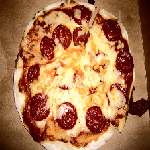

In [94]:
test_image

In [0]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [0]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=test_image.reshape(1,150,150,3)

In [97]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [0]:
## Class label of dog and cat

if result == 1:
    prediction = 'Good Pizza'
else:
    prediction = 'Burnt Pizza'
    

In [99]:
prediction

'Good Pizza'

# saving weights

In [0]:
# serialize model to JSON

model_json = classifier.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
# serialize weights to disk
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
